In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Q1: Save the dataset into pandas dataframe

In [3]:
# df_boston.head()
# using pandas dataframe
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston.head()
df_boston.shape

(506, 13)

## Q2: Use different histograms to plot features that have right, left and zero skew.

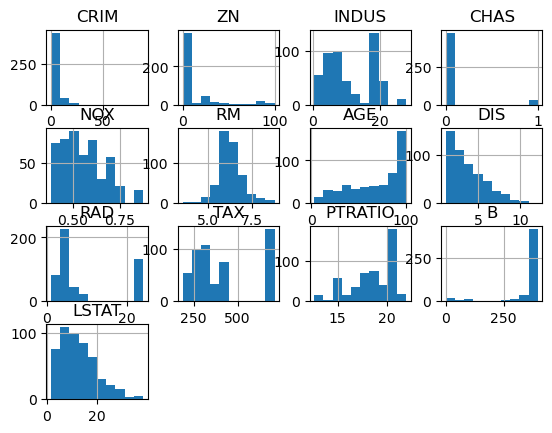

In [ ]:
df_boston.hist();

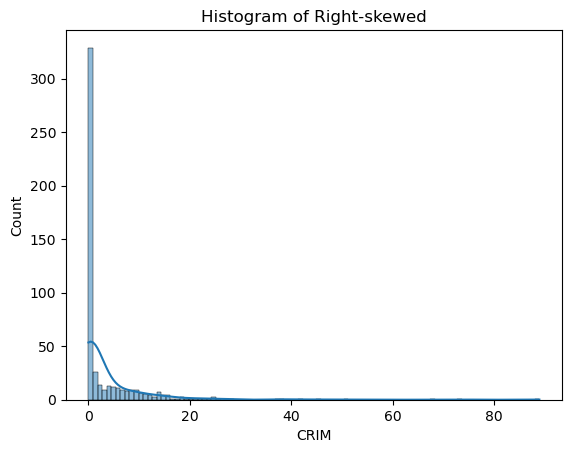

In [4]:
# Right skewed
sns.histplot(df_boston['CRIM'], kde=True)
plt.title('Right-skewed')
plt.show()

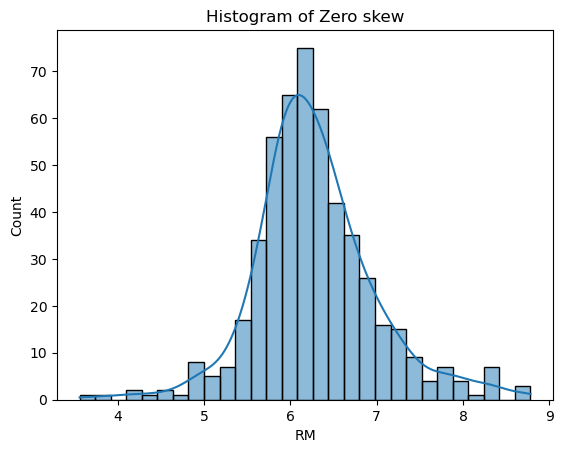

In [5]:
# Zero skew 
sns.histplot(df_boston['RM'], kde=True)
plt.title('Zero skew')
plt.show()

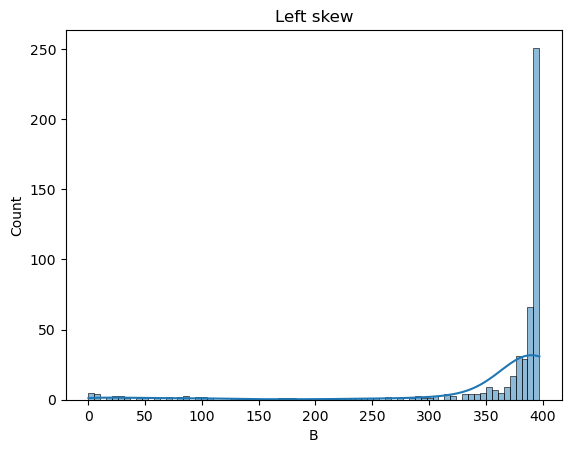

In [7]:
# Left skew 
sns.histplot(df_boston['B'], kde=True)
plt.title('Left skew')
plt.show()

## Q3: Prove your previous result using mean, median and mode.

In [8]:
feature = 'CRIM'
mean_value = df_boston[feature].mean()
median_value = df_boston[feature].median()
mode_value = df_boston[feature].mode()[0]

print(f"Mean of {feature}: {mean_value}")
print(f"Median of {feature}: {median_value}")
print(f"Mode of {feature}: {mode_value}")


Mean of CRIM: 3.6135235573122535
Median of CRIM: 0.25651
Mode of CRIM: 0.01501


In [9]:
feature = 'RM'
mean_value = df_boston[feature].mean()
median_value = df_boston[feature].median()
mode_value = df_boston[feature].mode()[0]

print(f"Mean of {feature}: {mean_value}")
print(f"Median of {feature}: {median_value}")
print(f"Mode of {feature}: {mode_value}")


Mean of RM: 6.284634387351787
Median of RM: 6.2085
Mode of RM: 5.713


In [10]:
feature = 'B'
mean_value = df_boston[feature].mean()
median_value = df_boston[feature].median()
mode_value = df_boston[feature].mode()[0]

print(f"Mean of {feature}: {mean_value}")
print(f"Median of {feature}: {median_value}")
print(f"Mode of {feature}: {mode_value}")


Mean of B: 356.67403162055257
Median of B: 391.44
Mode of B: 396.9


## Q4: Use Skew function of Pandas to print skewness of each feature.

In [15]:

skewness = df_boston.skew()
display(skewness)


CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
dtype: float64

## Q5: Use numpy to draw normal distribution.

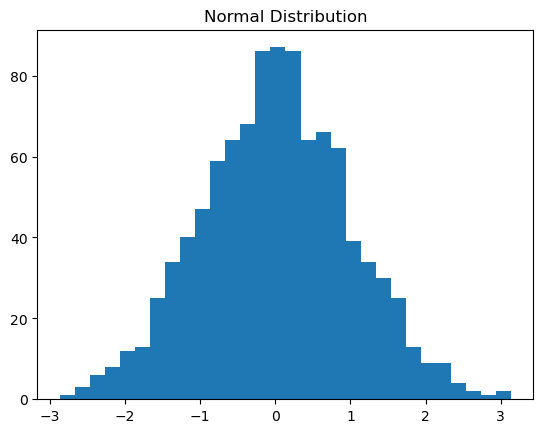

In [17]:
data = np.random.normal(0, 1, 999)
plt.hist(data, bins=30)
plt.title('Normal Distribution')
plt.show()

## Q6: Use numpy to draw uniform distribution.

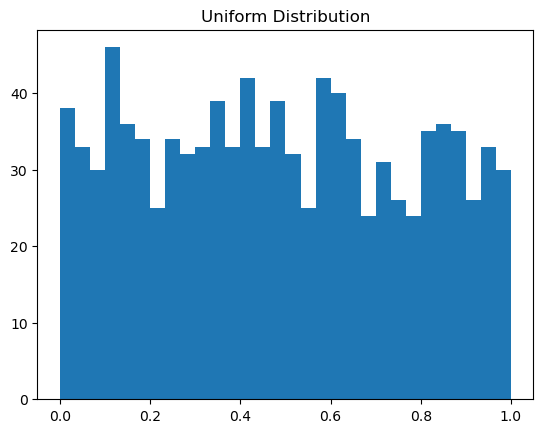

In [19]:
data = np.random.uniform(0, 1, 999)
plt.hist(data, bins=30)
plt.title('Uniform Distribution')
plt.show()

## Q7: Use numpy to draw binomial distribution.

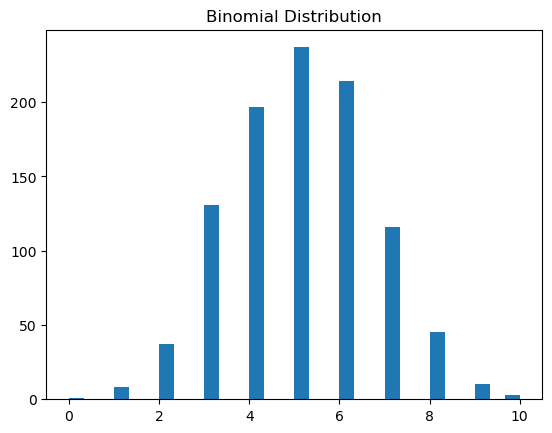

In [26]:
data = np.random.binomial(10, 0.5, 999)
plt.hist(data, bins=30)
plt.title('Binomial Distribution')
plt.show()

## Q8: Simulate Two Coin Flips, then draw the result distribution.

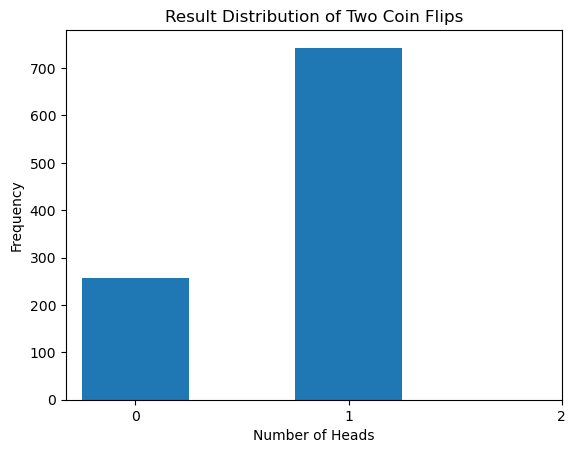

In [28]:
coin_flips = np.random.choice(['Head', 'Tail'], size=(2, 999))

heads_count = np.sum(coin_flips == 'Head', axis=0)

plt.hist(heads_count, bins=np.arange(3), align='left', rwidth=0.5)
plt.xticks(np.arange(3))
plt.xlabel('Heads')
plt.ylabel('Count')
plt.title('Result Distribution')
plt.show()


## Q9: Summary of Descriptive Statistics

1. Using scipy.stats
- nobs: the number of observations or elements in your dataset
- minmax: the tuple with the minimum and maximum values of your dataset
- mean: the mean of your dataset
- variance: the variance of your dataset
- skewness: the skewness of your dataset
- kurtosis: the kurtosis of your dataset

In [46]:
stats.describe(df_boston)


DescribeResult(nobs=506, minmax=(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  ])), mean=array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01]), variance=array([7.39865782e+01, 5.43936814e+02, 4.70644425e+01, 6.45129730e-02,
       1.34276357e-02, 4.93670850e-01, 7.92358399e+02, 4.43401514e+00,
       7.58163660e+01, 2.84047595e+04, 4.68698912e+00, 8.33475226e+03,
       5.09947595e+01]), skewness=array([ 5.20765239,  2.21906306,  0.29414628,  3.39579929,  0.72714416,
        0.40241467, -0.59718559,  1.00877876,  1.00183349,  0.6

2. method .describe()
- count: the number of elements in your dataset
- mean: the mean of your dataset
- std: the standard deviation of your dataset
- min and max: the minimum and maximum values of your dataset
- 25%, 50%, and 75%: the quartiles of your dataset

In [33]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Q9: Summarize the differences between the Z-test and the T-test in three sentences.

-	The Z-test is used when deviation is known, while the T-test is used when standard deviation is unknown.
-	The Z-test can be used when the sample size is large, while the T-test should be used when the sample size is small.
-	The Z-test is more strong than the T-test, which means it is more likely to identify a significant difference between two samples' means.

## Calculate

Let's assume that a class's average score is higher than 70 with a standard deviation of 10.
Calculate the Z-value to determine whether there is sufficient data to support this claim at a 0.05 
significance level if a sample of 50 students was chosen and their mean score was 80.

In [47]:
import math

mean = 70
std_dev = 10
sample_mean = 80
sample_size = 50

# Calculate the Z-value
Z = (sample_mean - population_mean) / (population_std_dev / math.sqrt(sample_size))

print("Z-value:", Z)

Z-value: 7.0710678118654755


#### There is sufficient data to support the claim that the class's average score is higher than 70.


An establishment wants to boost sales. According to past sales data, each sale made by 30 salesmen averaged 
40 dollar. The most recent data indicated that an average sale per transaction was 60 dollar after some training.Find the t-value for a 20 dollar standard deviation. Did a training program increase sales?

In [50]:
mean = 40
sample_mean = 60
sample_size = 30
sample_std = 20

t_value = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))

print("T-value:", t_value)



T-value: -2.7386127875258306


#### we can reject the null hypothesis and  the training program has  increased sales.